In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
raw_mail_data = pd.read_csv('/content/spam_ham.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [19]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [20]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
mail_data.shape

(5572, 2)

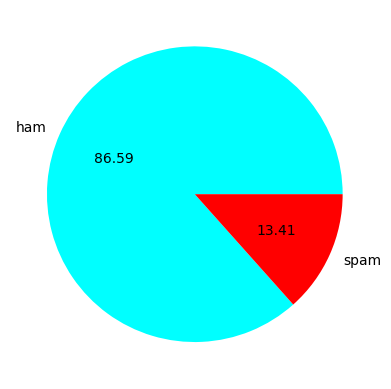

In [22]:
plt.pie(mail_data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['cyan', 'red'])
plt.show()

In [23]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [24]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


/tmp/ipython-input-4176131495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(x='Category',data=mail_data,palette=['red','green'])


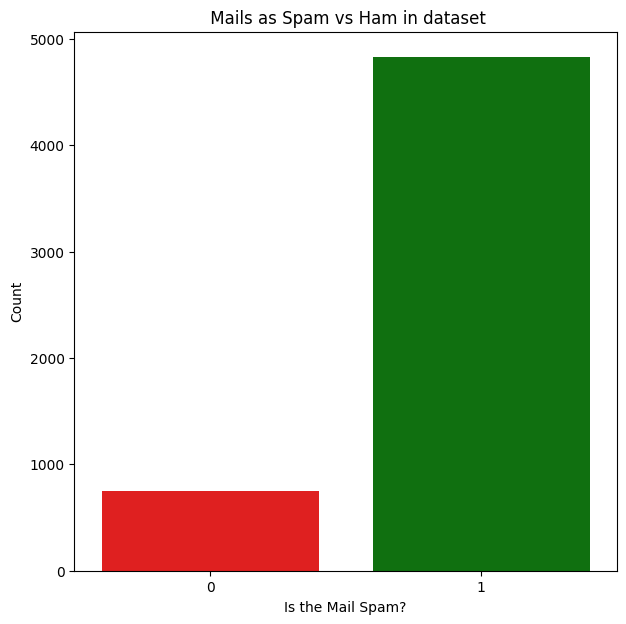

In [25]:
plt.figure(figsize=(7,7))
p=sns.countplot(x='Category',data=mail_data,palette=['red','green'])

p=plt.title(' Mails as Spam vs Ham in dataset')
p=plt.xlabel('Is the Mail Spam?')
p=plt.ylabel('Count')

In [26]:
X = mail_data['Message']

Y = mail_data['Category'].astype(int)

In [27]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [28]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [30]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [31]:
 feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


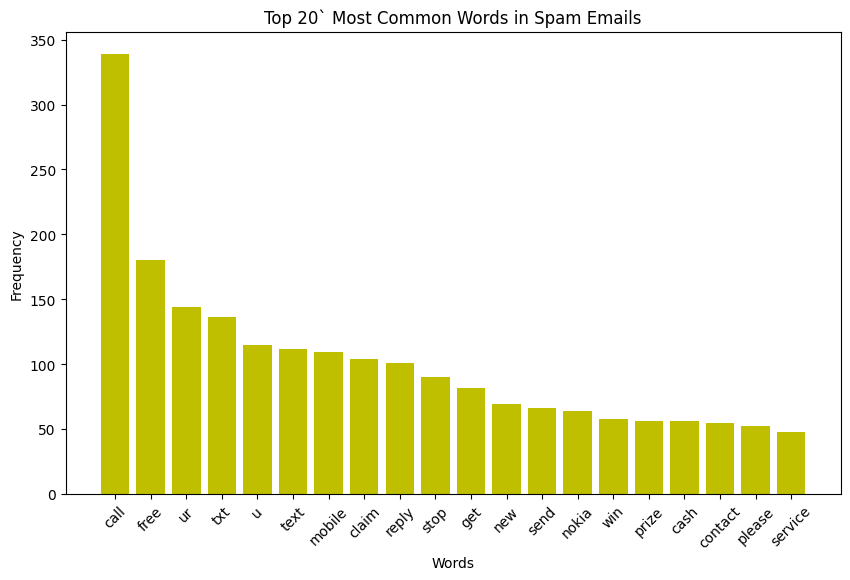

In [32]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

spam_words = " ".join(mail_data[mail_data['Category'] == 0]['Message']).split()


spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])


plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(20)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20` Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()


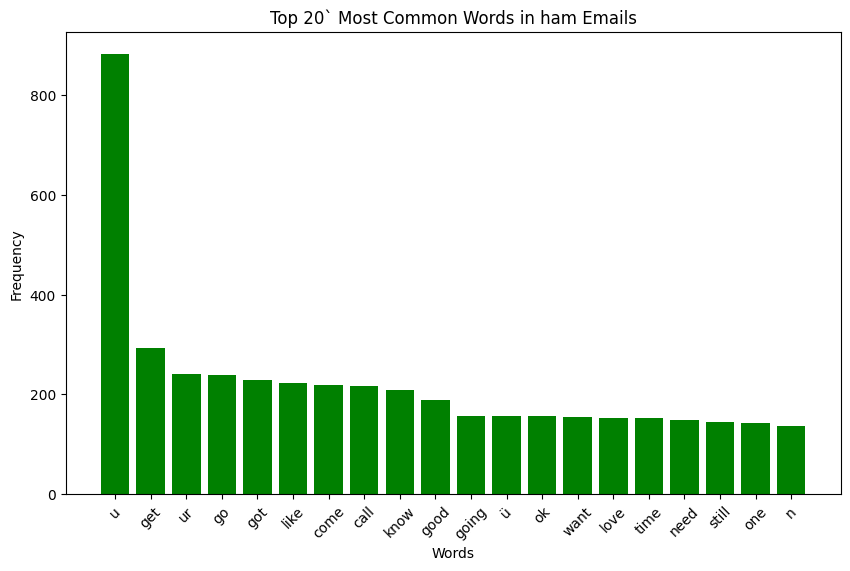

In [33]:
stop_words = set(stopwords.words('english'))

ham_words = " ".join(mail_data[mail_data['Category'] == 1]['Message']).split()


ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])


plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(20)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20` Most Common Words in ham Emails')
plt.xticks(rotation=45)
plt.show()

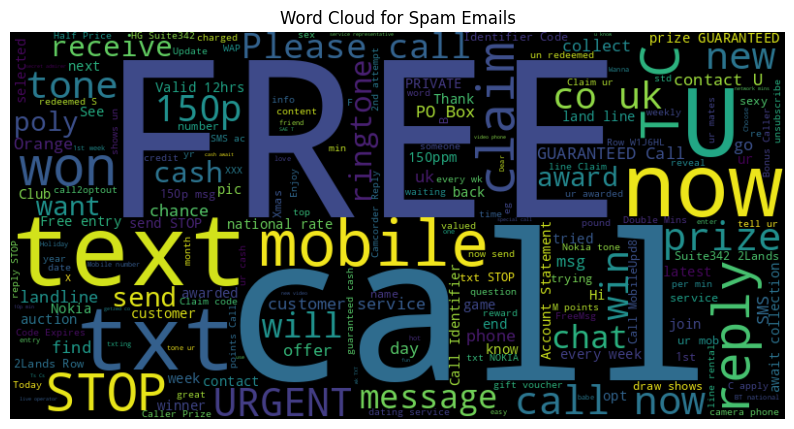

In [34]:
from wordcloud import WordCloud

spam_text = " ".join(mail_data[mail_data['Category'] == 0]['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()
print("")

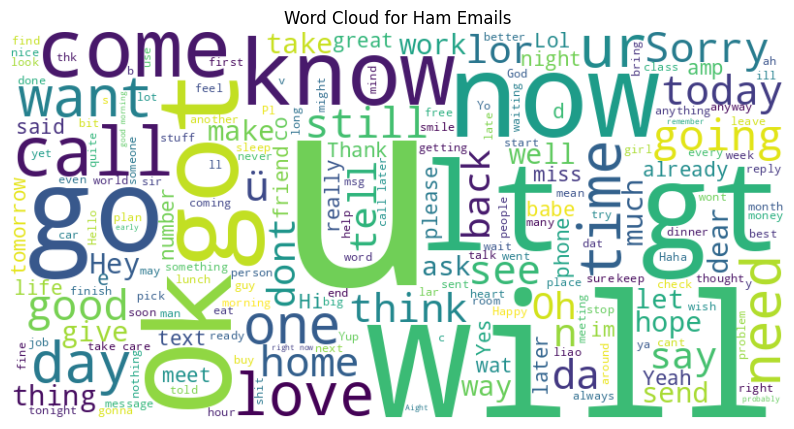

In [35]:
ham_text = " ".join(mail_data[mail_data['Category'] == 1]['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

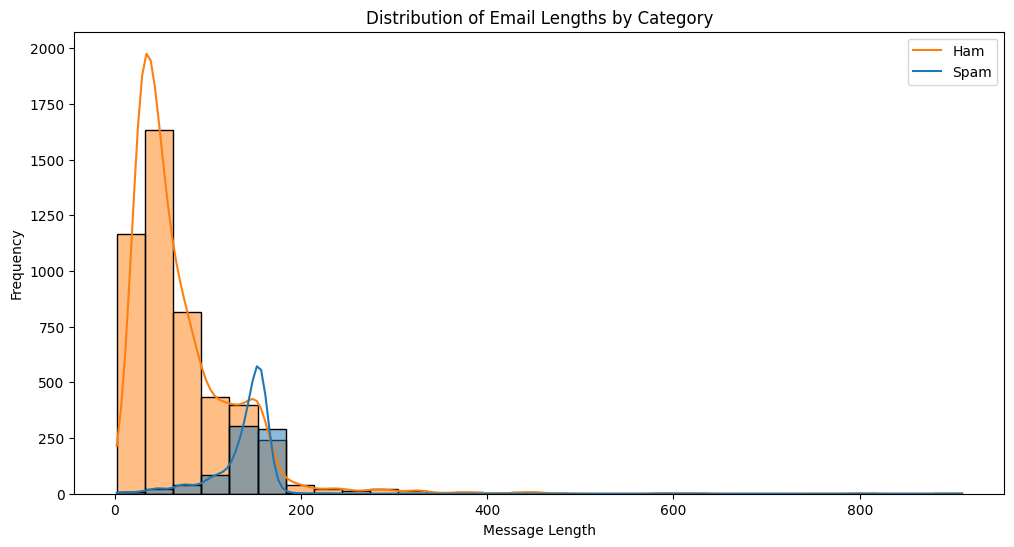

In [36]:
mail_data['Message_Length'] = mail_data['Message'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=mail_data, x='Message_Length', hue='Category', bins=30, kde=True)
plt.title('Distribution of Email Lengths by Category')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.show()

In [37]:
model_lr = LogisticRegression()
model_lr.fit(X_train_features, Y_train)

LogisticRegression()

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [39]:
model_dt = DecisionTreeClassifier(random_state=3)
model_dt.fit(X_train_features, Y_train)

DecisionTreeClassifier(random_state=3)

In [40]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=3)
model_rf.fit(X_train_features, Y_train)

RandomForestClassifier(random_state=3)

In [41]:
models = {'Logistic Regression': model_lr, 'K-Nearest Neighbors': model_knn, 'Decision Tree': model_dt,'Random Forest': model_rf }
results = []

for model_name, model in models.items():

    Y_pred = model.predict(X_test_features)


    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)


    results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.966816   0.962889  1.000000  0.981094
1  K-Nearest Neighbors  0.909417   0.904807  1.000000  0.950025
2        Decision Tree  0.963229   0.962739  0.995833  0.979007
3        Random Forest  0.976682   0.973631  1.000000  0.986639


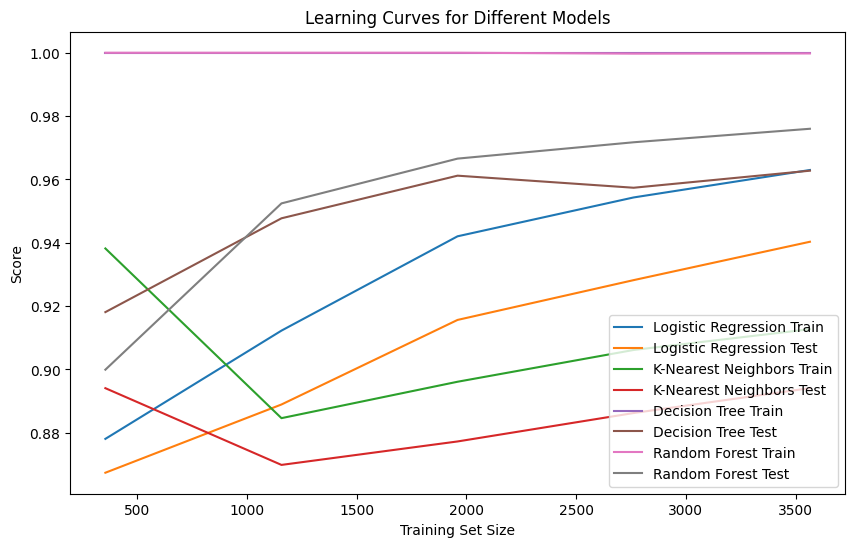

In [42]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_features, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=f'{model_name} Train')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=f'{model_name} Test')

plt.title("Learning Curves for Different Models")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()


In [43]:
import time
model_times = {}
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_features, Y_train)
    end_time = time.time()
    model_times[model_name] = end_time - start_time

# Displaying training times
for model_name, time_taken in model_times.items():
    print(f"{model_name}: {time_taken:.2f} seconds")


Logistic Regression: 0.07 seconds
K-Nearest Neighbors: 0.00 seconds
Decision Tree: 1.04 seconds
Random Forest: 2.73 seconds


In [44]:
best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


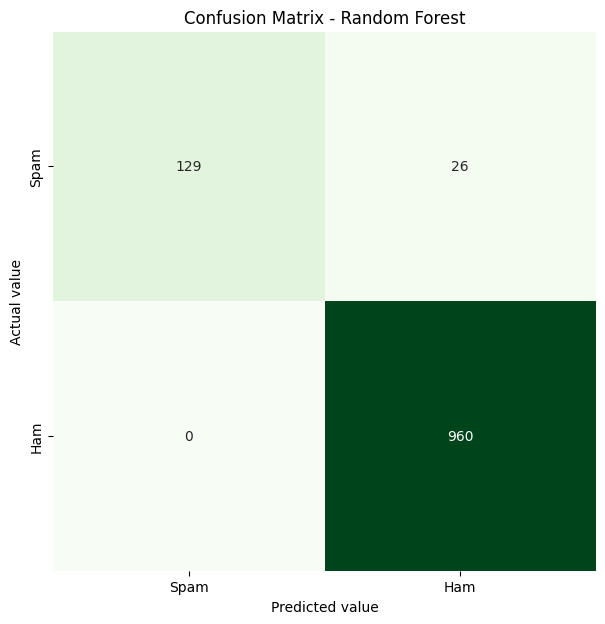

In [45]:
best_model = models[best_model_name]
Y_pred_best = best_model.predict(X_test_features)

conf_matrix = confusion_matrix(Y_test, Y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [46]:
best_metrics = results_df[results_df['Model'] == best_model_name]
print("Best Model Performance:")
print(best_metrics)

Best Model Performance:
           Model  Accuracy  Precision  Recall  F1 Score
3  Random Forest  0.976682   0.973631     1.0  0.986639


In [47]:
input_mail = ["Feeling hungry? Order online and win a coupon for cash prize."]

input_data_features = feature_extraction.transform(input_mail)


prediction = best_model.predict(input_data_features)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')

Spam mail
